이미지의 크기 : (1280, 853)
X : 1200, Y: 800의 픽셀값은 : [ 35  80 171]
(853, 1280, 3)


C:\Users\i\anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in ubyte_scalars


(853, 1280, 3)
(853, 1280, 1)


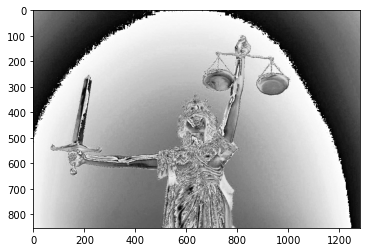

In [27]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 이미지를 하나 준비해요!
# 이미지가 준비됬으면 image를 불러들여요!

img = Image.open('./images/justice.jpg')

# plt.imshow(img)
# plt.show()

# pixel데이터를 ndarray로 뽑아내보아요!
pixel = np.array(img)

print('이미지의 크기 : {}'.format(img.size))  # tuple형태로 image의 size 리턴
# 특정 위치에 pixel값을 알아보아요!
# [ 28  60 143]
print('X : {}, Y: {}의 픽셀값은 : {}'.format(1200,800,pixel[800,1200]))
# pixel의 shape을 찍어보면 확실히 알아요!
print(pixel.shape)   # (853, 1280, 3) 

pixel[800,1200] = [ 0,  0, 0 ]

# plt.imshow(pixel)
# plt.show()

# Image 처리 기본

# 1. 이미지 저장
img.save('./images/my_picture.jpg')  # 이미지 객체의 정보를 이용하여 파일 생성

# 2. 이미지 crop
crop_mage = img.crop((30,210,270,700))
# plt.imshow(crop_mage)
# plt.show()

# 3. 이미지 resize
resize_img = img.resize((int(img.size[0]/8), int(img.size[1]/8))) 
# plt.imshow(resize_img)
# plt.show()

# 4. 이미지 회전
rotate_img = img.rotate(90)
# plt.imshow(rotate_img)
# plt.show()

# 5. 원래의 이미지를 흑백으로 처리할 꺼예요!
#    (R,G,B) 3원색으로 표현!!  => color가 잘 나와요!
#    각 픽셀의 RGB값을 지금 가지고 있는 RGB의 평균으로 바꾸면 흑백처리
#    (10,20,30)  => (20,20,20)이렇게 변경하면 흑백사진이 되요!
grey_pixel = pixel.copy()
for y in range(grey_pixel.shape[0]):
    for x in range(grey_pixel.shape[1]):
        grey = int((grey_pixel[y,x,0] + grey_pixel[y,x,1] + grey_pixel[y,x,2])/3)
        grey_pixel[y,x,0] = grey
        grey_pixel[y,x,1] = grey
        grey_pixel[y,x,2] = grey
        
        
# plt.imshow(grey_pixel)
# plt.show()  

print(grey_pixel.shape)
print(grey_pixel[:,:,0:1].shape)

plt.imshow(grey_pixel[:,:,0], cmap='Greys')
plt.show()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
ori_img의 shape : (428, 640, 3)
input_image shape : (1, 428, 640, 3)
변경된 input_image shape : (1, 428, 640, 1)
(3, 3, 1, 1)
결과 데이터의 shape : (1, 426, 638, 1)
(426, 638, 1)


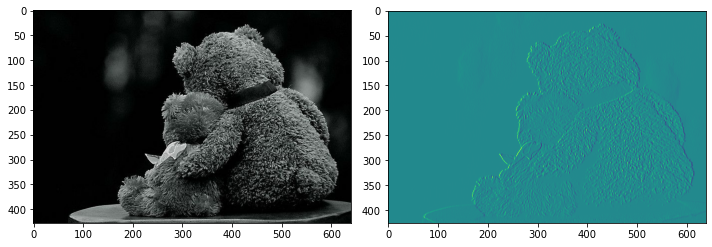

In [40]:
%reset

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# sub plot을 2개 만들어 보아요!

fig = plt.figure(figsize=(10,10))  # 가로 10인치, 세로 10인치

ax1 = fig.add_subplot(1,2,1)  # 1,2는 행과 열을 의미, 마지막 1인 그 중 몇번째인지를 의미
ax2 = fig.add_subplot(1,2,2)  # 1,2는 행과 열을 의미, 마지막 1인 그 중 몇번째인지를 의미

ori_img = img.imread('./images/teddy-bear.jpg')
ax1.imshow(ori_img)

print('ori_img의 shape : {}'.format(ori_img.shape))

# convolution연산을 수행하려면 4차원이 필요!
# 이미지가 3차원 + 그런 이미지가 여러장 이니까 4차원으로 표현!!
# 현재 shape : (428, 640, 3)
# (이미지 개수, height, weight, color) 이 형식으로 convolution 입력으로 넣어요!
input_image = ori_img.reshape((1,) + ori_img.shape)
print('input_image shape : {}'.format(input_image.shape))
input_image = input_image.astype(np.float32)  # 정수형 ndarray를 실수형으로 변환

# 입력이미지의 color수를 변경 -> channel을 1로 변경
input_image = input_image[:,:,:,:1]
print('변경된 input_image shape : {}'.format(input_image.shape))

# filter를 준비해야 해요!
# filter : (filter height,filter width,filter channel,filter 개수)
# filter는 정방형 중에 3x3을 많이 사용!
# filter : (3, 3, 1, 1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])
print(weight.shape)

sess = tf.Session()

con2d = tf.nn.conv2d(input_image,
                     weight,
                     strides=[1,1,1,1],
                     padding='VALID')

result = sess.run(con2d)

print('결과 데이터의 shape : {}'.format(result.shape))   # (1, 426, 638, 1)
                                                         # (이미지개수, height, width, filter개수)
    
t_img = result[0,:,:,:]
print(t_img.shape)
ax2.imshow(t_img)

fig.tight_layout()
plt.show()

In [42]:
# Pooling 처리

import numpy as np
import tensorflow as tf

# 입력이미지
# (1, 4, 4, 1) => (이미지개수, height, width, channel)
image = np.array([[[[1],[1],[1],[1]],
                 [[1],[1],[1],[1]],
                 [[1],[1],[1],[1]],
                 [[1],[1],[1],[1]]]], dtype=np.float32)
print(image.shape)

# pooling??
pool = tf.nn.max_pool(image, 
                      ksize=[1,2,2,1],
                      strides=[1,2,2,1],
                      padding='VALID')

sess = tf.Session()
result = sess.run(pool)

print(result.shape)

(1, 4, 4, 1)
(1, 2, 2, 1)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
ori_img의 shape : (428, 640, 3)
input_image shape : (1, 428, 640, 3)
변경된 input_image shape : (1, 428, 640, 1)
(3, 3, 1, 1)
결과 데이터의 shape : (1, 426, 638, 1)
(426, 638, 1)
(1, 213, 319, 1)


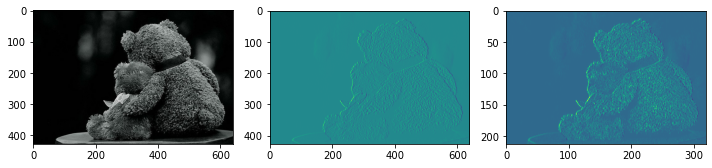

In [44]:
#### 오늘해야될 실습은..

### 원본이미지 -> convolution처리 -> pooling처리
### 각각의 이미지를 subplot으로 화면에 출력!!
### 이미지 3장을 출력해 보세요|!!

%reset

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# sub plot을 2개 만들어 보아요!

fig = plt.figure(figsize=(10,10))  # 가로 10인치, 세로 10인치

ax1 = fig.add_subplot(1,3,1)  # 1,3은 행과 열을 의미, 마지막 1인 그 중 몇번째인지를 의미
ax2 = fig.add_subplot(1,3,2)  
ax3 = fig.add_subplot(1,3,3)  

ori_img = img.imread('./images/teddy-bear.jpg')
ax1.imshow(ori_img)

print('ori_img의 shape : {}'.format(ori_img.shape))

# convolution연산을 수행하려면 4차원이 필요!
# 이미지가 3차원 + 그런 이미지가 여러장 이니까 4차원으로 표현!!
# 현재 shape : (428, 640, 3)
# (이미지 개수, height, weight, color) 이 형식으로 convolution 입력으로 넣어요!
input_image = ori_img.reshape((1,) + ori_img.shape)
print('input_image shape : {}'.format(input_image.shape))
input_image = input_image.astype(np.float32)  # 정수형 ndarray를 실수형으로 변환

# 입력이미지의 color수를 변경 -> channel을 1로 변경
input_image = input_image[:,:,:,:1]
print('변경된 input_image shape : {}'.format(input_image.shape))

# filter를 준비해야 해요!
# filter : (filter height,filter width,filter channel,filter 개수)
# filter는 정방형 중에 3x3을 많이 사용!
# filter : (3, 3, 1, 1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])
print(weight.shape)

sess = tf.Session()

con2d = tf.nn.conv2d(input_image,
                     weight,
                     strides=[1,1,1,1],
                     padding='VALID')

result = sess.run(con2d)

print('결과 데이터의 shape : {}'.format(result.shape))   # (1, 426, 638, 1)
                                                         # (이미지개수, height, width, filter개수)
    
t_img = result[0,:,:,:]
print(t_img.shape)
ax2.imshow(t_img)

pool = tf.nn.max_pool(result, 
                      ksize=[1,2,2,1],
                      strides=[1,2,2,1],
                      padding='VALID')

sess = tf.Session()
result = sess.run(pool)

print(result.shape)

t_img = result[0,:,:,:]
ax3.imshow(t_img)

fig.tight_layout()
plt.show()